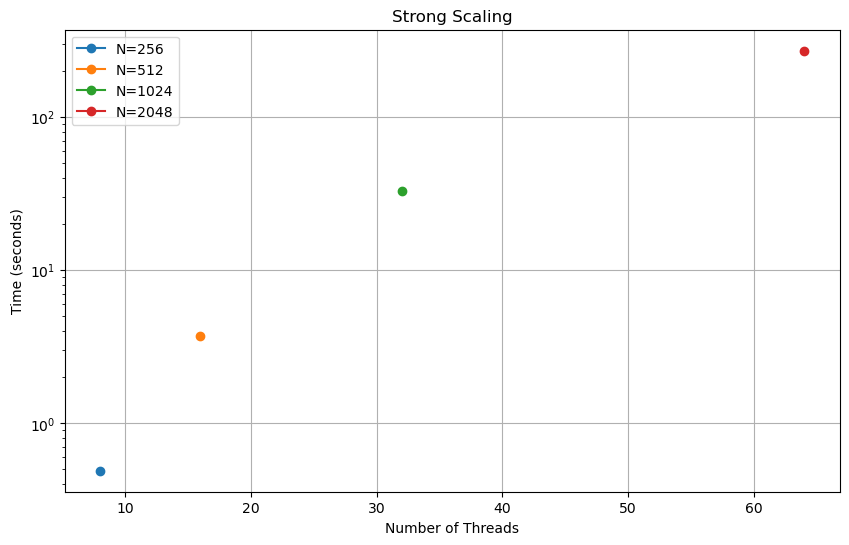

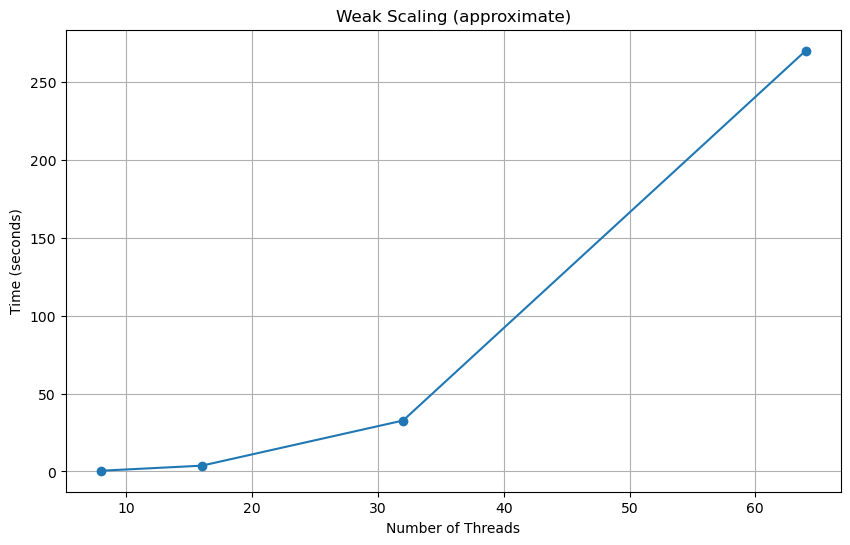

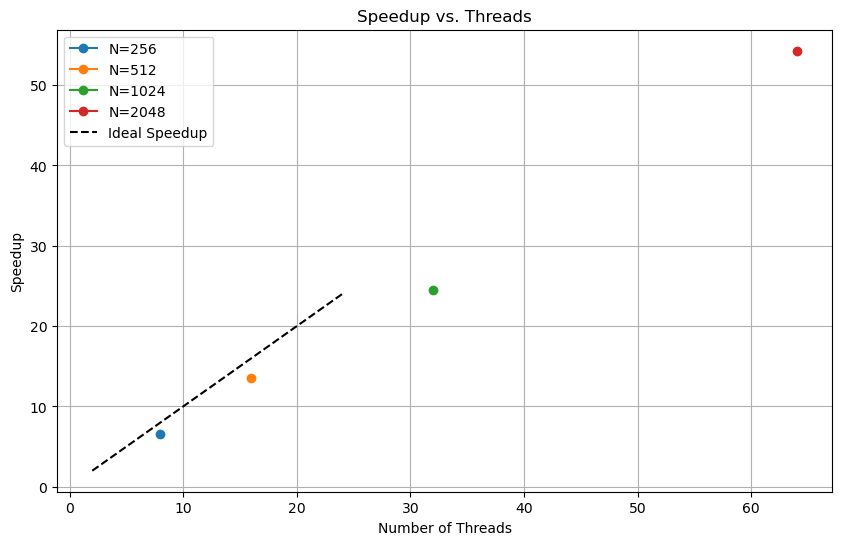

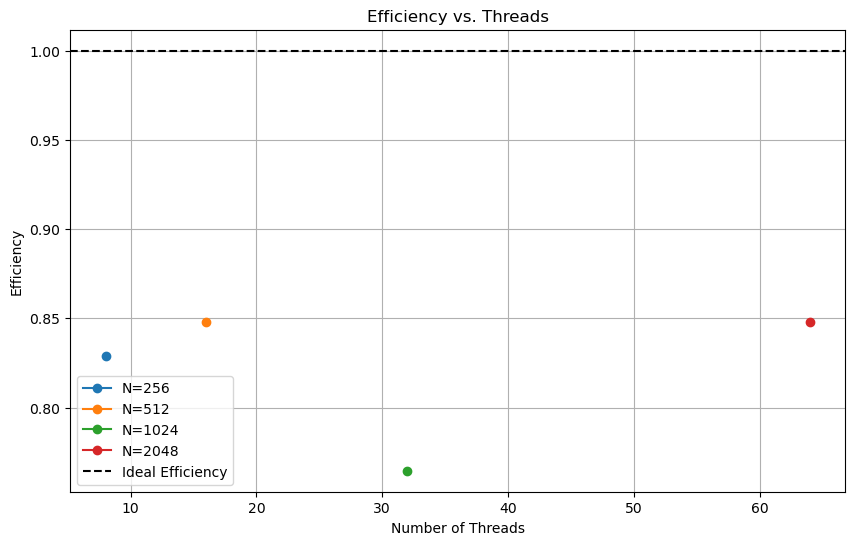

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
serial_df = pd.read_csv('serial_results.csv')
parallel_df = pd.read_csv('weak.csv')

# Strong Scaling Graph
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['time'], marker='o', label=f'N={N}')
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.yscale('log')  # Log scale for better visualization
plt.title('Strong Scaling')
plt.legend()
plt.grid(True)
plt.savefig('strong_scaling.png')
plt.show()

# Weak Scaling Graph
weak_scaling_data = []
for threads, N in [(8, 256), (16, 512), (32, 1024), (64, 2048)]:
    time = parallel_df[(parallel_df['N'] == N) & (parallel_df['threads'] == threads)]['time'].values[0]
    weak_scaling_data.append((threads, time))
weak_df = pd.DataFrame(weak_scaling_data, columns=['threads', 'time'])
plt.figure(figsize=(10, 6))
plt.plot(weak_df['threads'], weak_df['time'], marker='o')
plt.xlabel('Number of Processes')
plt.ylabel('Time (seconds)')
plt.title('Weak Scaling (approximate)')
plt.grid(True)
plt.savefig('weak_scaling.png')
plt.show()

# Speedup Graph
serial_times = dict(zip(serial_df['N'], serial_df['time']))
parallel_df['speedup'] = parallel_df.apply(lambda row: serial_times[row['N']] / row['time'], axis=1)
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['speedup'], marker='o', label=f'N={N}')
plt.plot([2, 24], [2, 24], 'k--', label='Ideal Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs. Threads')
plt.legend()
plt.grid(True)
plt.savefig('speedup.png')
plt.show()

# Efficiency Graph
parallel_df['efficiency'] = parallel_df['speedup'] / parallel_df['threads']
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['efficiency'], marker='o', label=f'N={N}')
plt.axhline(y=1, color='k', linestyle='--', label='Ideal Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Threads')
plt.legend()
plt.grid(True)
plt.savefig('efficiency.png')
plt.show()

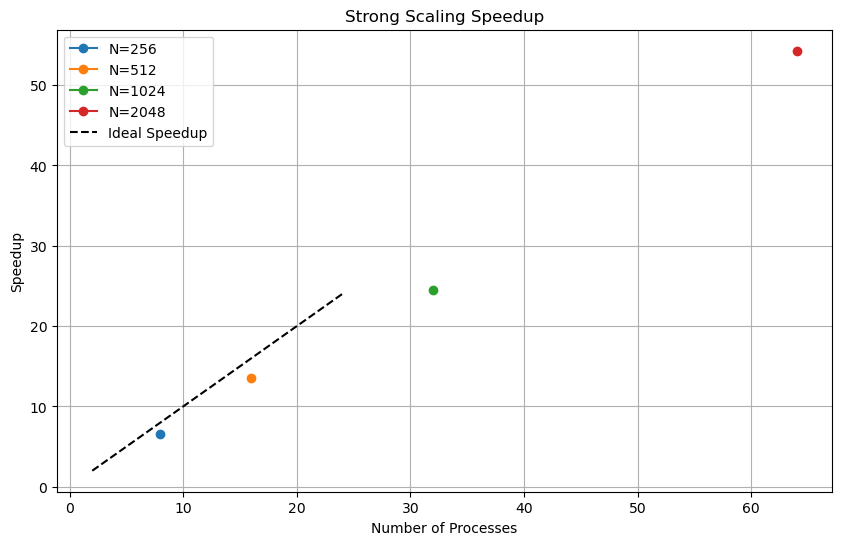

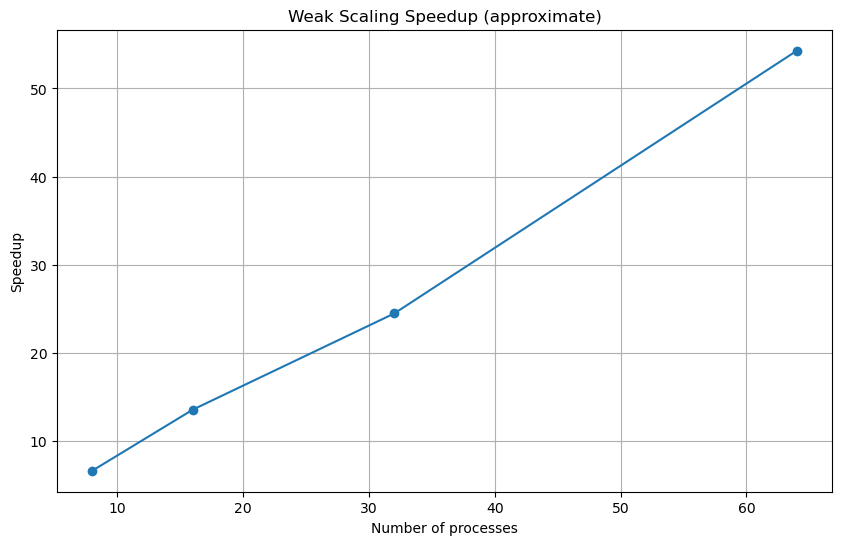

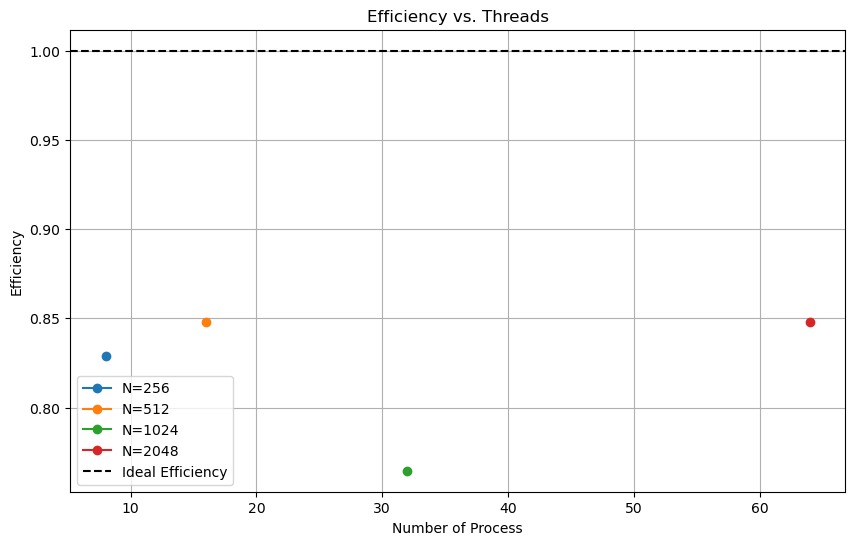

In [2]:
serial_times = dict(zip(serial_df['N'], serial_df['time']))
parallel_df['speedup'] = parallel_df.apply(lambda row: serial_times[row['N']] / row['time'], axis=1)

# Strong Scaling Speedup Graph
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['speedup'], marker='o', label=f'N={N}')
plt.plot([2, 24], [2, 24], 'k--', label='Ideal Speedup')
plt.xlabel('Number of Processes')
plt.ylabel('Speedup')
plt.title('Strong Scaling Speedup')
plt.legend()
plt.grid(True)
plt.savefig('strong_scaling_speedup.png')
plt.show()

# Weak Scaling Speedup Graph
weak_scaling_data = []
for threads, N in [(8, 256), (16, 512), (32, 1024), (64, 2048)]:
    serial_time = serial_times[N]
    parallel_time = parallel_df[(parallel_df['N'] == N) & (parallel_df['threads'] == threads)]['time'].values[0]
    speedup = serial_time / parallel_time
    weak_scaling_data.append((threads, speedup))
weak_df = pd.DataFrame(weak_scaling_data, columns=['threads', 'speedup'])
plt.figure(figsize=(10, 6))
plt.plot(weak_df['threads'], weak_df['speedup'], marker='o')
plt.xlabel('Number of processes')
plt.ylabel('Speedup')
plt.title('Weak Scaling Speedup (approximate)')
plt.grid(True)
plt.savefig('weak_scaling_speedup.png')
plt.show()

# Efficiency Graph
parallel_df['efficiency'] = parallel_df['speedup'] / parallel_df['threads']
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['efficiency'], marker='o', label=f'N={N}')
plt.axhline(y=1, color='k', linestyle='--', label='Ideal Efficiency')
plt.xlabel('Number of Process')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Threads')
plt.legend()
plt.grid(True)
plt.savefig('efficiency.png')
plt.show()

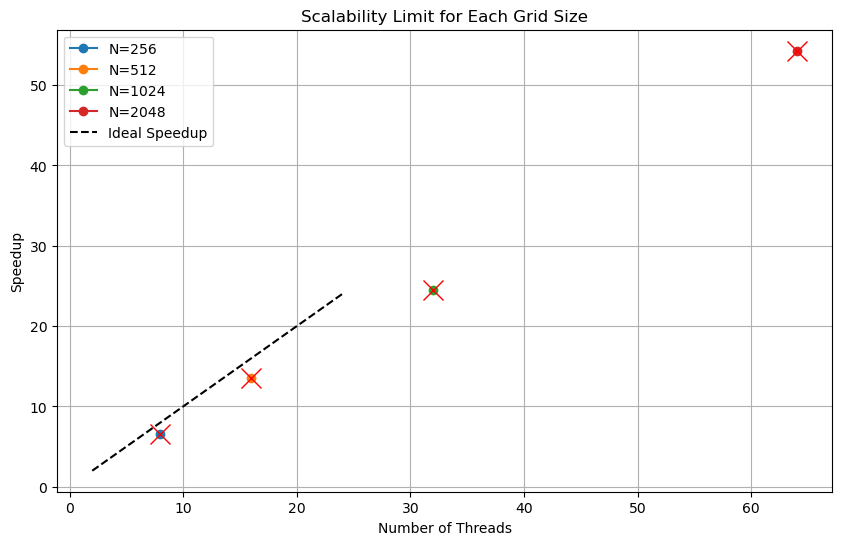

In [3]:
# Function to find scalability limit (where speedup increase < 10% of previous speedup)
def find_scalability_limit(subset):
    threads = subset['threads'].values
    speedups = subset['speedup'].values
    for i in range(1, len(threads)):
        speedup_diff = speedups[i] - speedups[i-1]
        if speedup_diff / speedups[i-1] < 0.1:  # Less than 10% improvement
            return threads[i], speedups[i]
    return threads[-1], speedups[-1]  # Return last point if no limit found

# Scalability Limit Graph
plt.figure(figsize=(10, 6))
for N in parallel_df['N'].unique():
    subset = parallel_df[parallel_df['N'] == N]
    plt.plot(subset['threads'], subset['speedup'], marker='o', label=f'N={N}')
    limit_threads, limit_speedup = find_scalability_limit(subset)
    plt.plot(limit_threads, limit_speedup, 'rx', markersize=15, label=f'Limit N={N}' if N == 128 else None)
plt.plot([2, 24], [2, 24], 'k--', label='Ideal Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Scalability Limit for Each Grid Size')
plt.legend()
plt.grid(True)
plt.savefig('scalability_limit.png')
plt.show()